In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
import statistics

In [3]:
wide_ts = pd.read_csv('../dataraw/Housing_data.csv')

In [4]:
ts = pd.melt(wide_ts, id_vars=['RegionID', 'RegionType', 'RegionName', 
                          'SizeRank', 'StateName', 'State', 'Metro', 'CountyName'], var_name='time')
ts['StateAndCounty'] = ts['StateName'] + ' ' + ts['CountyName']
ts['time'] = pd.to_datetime(ts['time'])
ts.head()

,RegionID,RegionType,RegionName,SizeRank,StateName,State,Metro,CountyName,time,value,StateAndCounty
0,6181,City,New York,0,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,498033.0,NY Queens County
1,12447,City,Los Angeles,1,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,461350.0,CA Los Angeles County
2,39051,City,Houston,2,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,221723.0,TX Harris County
3,17426,City,Chicago,3,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,312511.0,IL Cook County
4,6915,City,San Antonio,4,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,177641.0,TX Bexar County


In [5]:
def get_num_nas(df):
    """Returns a list of Columns and associated NA value count for given DataFrame"""
    results = []
    for column in df.columns.to_list():
        results.append({column : df[column].isna().sum()})
    return results
get_num_nas(ts)

[{'RegionID': 0},
 {'RegionType': 0},
 {'RegionName': 0},
 {'SizeRank': 0},
 {'StateName': 0},
 {'State': 0},
 {'Metro': 1828827},
 {'CountyName': 0},
 {'time': 0},
 {'value': 1619302},
 {'StateAndCounty': 0}]

In [6]:
results = []
for column in ts.columns.to_list():
    results.append({column : ts[column].value_counts()})
results

[{'RegionID': 8196      261
  19136     261
  31428     261
  19138     261
  47837     261
           ... 
  21830     261
  238904    261
  398729    261
  42335     261
  16376     261
  Name: RegionID, Length: 25915, dtype: int64},
 {'RegionType': City    6763815
  Name: RegionType, dtype: int64},
 {'RegionName': Franklin           7308
  Madison            6525
  Clinton            6264
  Washington         6264
  Springfield        6264
                     ... 
  Roca                261
  Creole              261
  Sherrills Ford      261
  Sadieville          261
  East Petersburg     261
  Name: RegionName, Length: 16563, dtype: int64},
 {'SizeRank': 29449    297018
  28769      3915
  25996      3915
  29144      3915
  23231      3654
            ...  
  1446        261
  5540        261
  9634        261
  1445        261
  4094        261
  Name: SizeRank, Length: 11236, dtype: int64},
 {'StateName': TX    402201
  IL    335646
  OH    302499
  CA    291276
  MO    267786
 

In [7]:
ts.dropna(inplace=True)
get_num_nas(ts)

[{'RegionID': 0},
 {'RegionType': 0},
 {'RegionName': 0},
 {'SizeRank': 0},
 {'StateName': 0},
 {'State': 0},
 {'Metro': 0},
 {'CountyName': 0},
 {'time': 0},
 {'value': 0},
 {'StateAndCounty': 0}]

In [8]:
# ts['time'] = pd.to_datetime(ts['time'])
# ts = ts.groupby('time').aggregate({'value':'mean'})
# ts.set_index('time', inplace=True)
# ts

Mean:  215.17780833509624 
Median:  261.0 
Standerd Deviation:  63.0471292704858


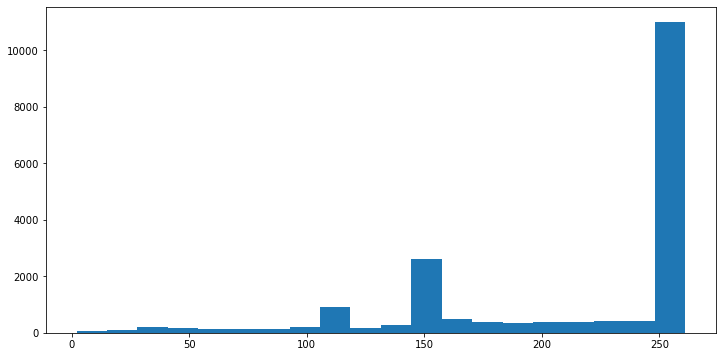

In [9]:
num_by_region = sorted(ts.groupby('RegionID').count()['value'].to_list(), reverse=True)
def display_hist(list):
    mean = statistics.mean(list)
    median = statistics.median(list)
    std = statistics.stdev(list)
    print('Mean: ', mean, '\nMedian: ', median, '\nStanderd Deviation: ', std)
    plt.figure(figsize=(12,6))
    plt.hist(list, bins=20);
display_hist(num_by_region)

Mean:  3351.3855024711697 
Median:  1853.5 
Standerd Deviation:  4664.48703509449


1214

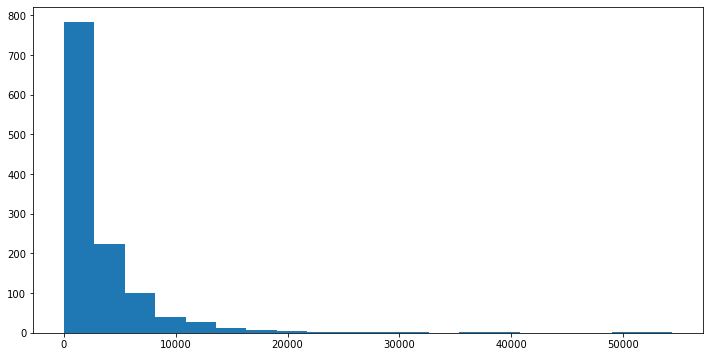

In [10]:
num_by_county = sorted(ts.groupby('CountyName').count()['value'].to_list(), reverse=True)
display_hist(num_by_county)
len(num_by_county)

Mean:  6861.266666666666 
Median:  6501.0 
Standerd Deviation:  1361.8920645652236


150

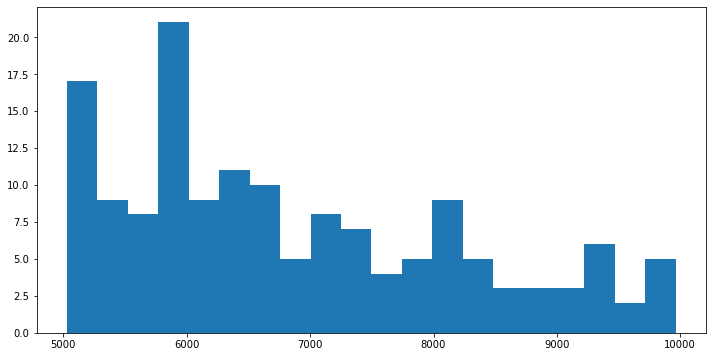

In [11]:
this_list = []
for i in num_by_county:
    if i < 10000 and i > 5000:
        this_list.append(i)

display_hist(this_list)
len(this_list)

Mean:  219.83019686533976 
Median:  261 
Standerd Deviation:  56.56804074639447


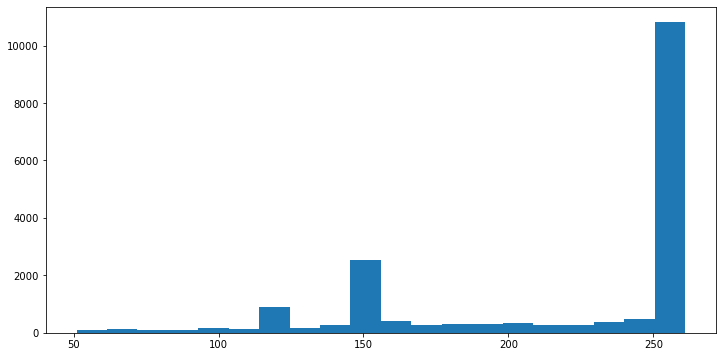

In [12]:
this_list = []
for i in num_by_region:
    if i > 50:
        this_list.append(i)
display_hist(this_list)

In [13]:
chosen_df = ts[ts['time'] == ts['time'].max()]
chosen_df

,RegionID,RegionType,RegionName,SizeRank,StateName,State,Metro,CountyName,time,value,StateAndCounty
6737900,6181,City,New York,0,NY,NY,New York-Newark-Jersey City,Queens County,2021-09-30,1308794.0,NY Queens County
6737901,12447,City,Los Angeles,1,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2021-09-30,1723915.0,CA Los Angeles County
6737902,39051,City,Houston,2,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2021-09-30,433282.0,TX Harris County
6737903,17426,City,Chicago,3,IL,IL,Chicago-Naperville-Elgin,Cook County,2021-09-30,519673.0,IL Cook County
6737904,6915,City,San Antonio,4,TX,TX,San Antonio-New Braunfels,Bexar County,2021-09-30,356965.0,TX Bexar County
...,...,...,...,...,...,...,...,...,...,...,...
6763808,43205,City,Tome,29449,NM,NM,Albuquerque,Valencia County,2021-09-30,325556.0,NM Valencia County
6763809,48550,City,Winton,29449,MN,MN,Duluth,Saint Louis County,2021-09-30,138277.0,MN Saint Louis County
6763810,51821,City,Eastabuchie,29449,MS,MS,Laurel,Jones County,2021-09-30,104339.0,MS Jones County
6763811,232607,City,Dean,29449,TX,TX,Wichita Falls,Clay County,2021-09-30,309688.0,TX Clay County


Mean:  12.719236425037366 
Median:  12.671697953882584 
Standerd Deviation:  0.6796526549125236


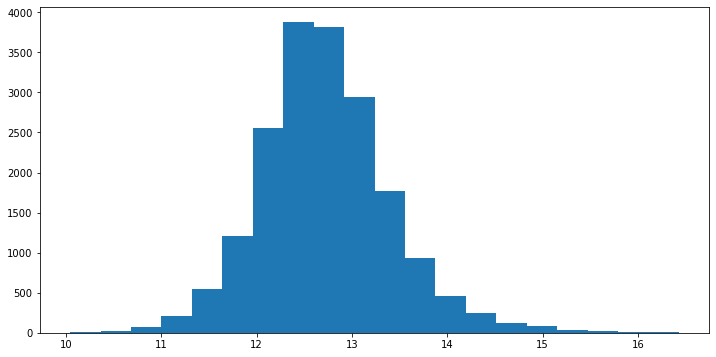

In [14]:
display_hist(np.log(chosen_df.value))

In [15]:
this_df = chosen_df.assign(log_val=np.log(chosen_df.value)).query('log_val >= 12.695 and log_val <= 12.705')

In [16]:
this_df.head()

,RegionID,RegionType,RegionName,SizeRank,StateName,State,Metro,CountyName,time,value,StateAndCounty,log_val
6737918,10920,City,Columbus,18,OH,OH,Columbus,Franklin County,2021-09-30,327467.0,OH Franklin County,12.699143
6738108,41324,City,Tyler,211,TX,TX,Tyler,Smith County,2021-09-30,327862.0,TX Smith County,12.700348
6738161,47847,City,Sterling Heights,265,MI,MI,Detroit-Warren-Dearborn,Macomb County,2021-09-30,326143.0,MI Macomb County,12.695091
6738365,30236,City,Appleton,472,WI,WI,Appleton,Outagamie County,2021-09-30,326583.0,WI Outagamie County,12.696439
6738517,20323,City,Salisbury,627,NC,NC,Charlotte-Concord-Gastonia,Rowan County,2021-09-30,328854.0,NC Rowan County,12.703369


In [17]:
this_df.assign(uid=this_df.State+this_df.CountyName).uid.nunique()

120

In [18]:
this_df.StateAndCounty.nunique(), this_df.CountyName.nunique()

(120, 107)

<AxesSubplot:>

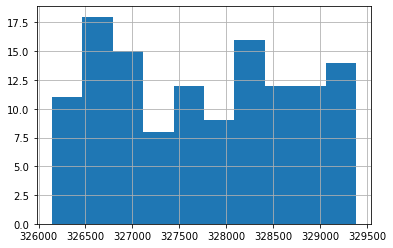

In [19]:
this_df.value.hist()

In [20]:
chosen_countynames = this_df.StateAndCounty.unique()
list(chosen_countynames)


['OH Franklin County',
 'TX Smith County',
 'MI Macomb County',
 'WI Outagamie County',
 'NC Rowan County',
 'NC Iredell County',
 'WV Berkeley County',
 'SC Berkeley County',
 'ND Ward County',
 'NJ Essex County',
 'OH Lake County',
 'NC Craven County',
 'LA Ascension Parish',
 'FL Broward County',
 'TX Brazoria County',
 'TX Harris County',
 'TN Coffee County',
 'IN Dubois County',
 'CA Fresno County',
 'NC Lincoln County',
 'SC Horry County',
 'MA Franklin County',
 'NC Chatham County',
 'MI Mason County',
 'IL Saint Clair County',
 'GA Jackson County',
 'LA East Baton Rouge Parish',
 'TX San Patricio County',
 'VA Caroline County',
 'AL Baldwin County',
 'FL Miami-Dade County',
 'CT Windham County',
 'TX Hunt County',
 'GA Barrow County',
 'NC Union County',
 'WI Portage County',
 'SC Beaufort County',
 'TN Putnam County',
 'OH Portage County',
 'OH Clermont County',
 'PA Erie County',
 'MI Ingham County',
 'MI Ionia County',
 'MI Muskegon County',
 'AL Morgan County',
 'MD Wicomic

In [21]:
ts_bools = ts.StateAndCounty.isin(chosen_countynames)
ts = ts[ts_bools]
ts.head()

,RegionID,RegionType,RegionName,SizeRank,StateName,State,Metro,CountyName,time,value,StateAndCounty
2,39051,City,Houston,2,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,221723.0,TX Harris County
16,18172,City,Fort Worth,16,TX,TX,Dallas-Fort Worth-Arlington,Tarrant County,2000-01-31,170640.0,TX Tarrant County
18,10920,City,Columbus,18,OH,OH,Columbus,Franklin County,2000-01-31,162504.0,OH Franklin County
33,18203,City,Fresno,33,CA,CA,Fresno,Fresno County,2000-01-31,174019.0,CA Fresno County
39,12700,City,Miami,39,FL,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,2000-01-31,284807.0,FL Miami-Dade County


In [22]:
get_num_nas(ts)

[{'RegionID': 0},
 {'RegionType': 0},
 {'RegionName': 0},
 {'SizeRank': 0},
 {'StateName': 0},
 {'State': 0},
 {'Metro': 0},
 {'CountyName': 0},
 {'time': 0},
 {'value': 0},
 {'StateAndCounty': 0}]

In [23]:
ts_list = []
for county in chosen_countynames:
    temp_ts = ts[ts['StateAndCounty'] == county]
    temp_ts = temp_ts.groupby('time').aggregate({'value' :'mean'})
    column_name = county + ' value'
    temp_ts.rename(columns={'value' : column_name}, inplace=True)
#     temp_ts.set_index('time', inplace=True)
    ts_list.append(temp_ts)


<AxesSubplot:xlabel='time'>

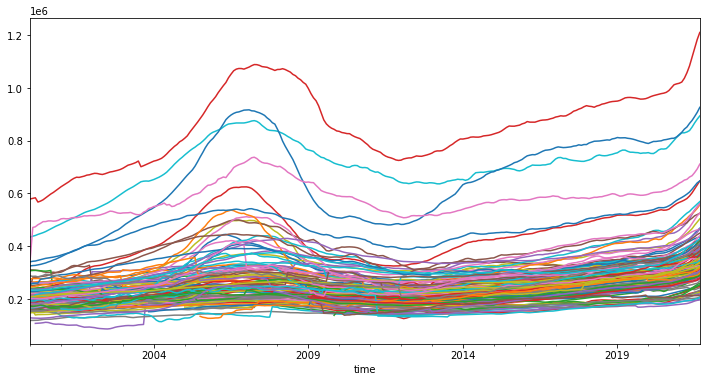

In [24]:
full_ts = pd.concat(ts_list, axis=1)
full_ts.plot(figsize=(12,6), legend=False)

In [25]:
full_ts.describe()
# Back fill NA values or interpolate

,OH Franklin County value,TX Smith County value,MI Macomb County value,WI Outagamie County value,NC Rowan County value,NC Iredell County value,WV Berkeley County value,SC Berkeley County value,ND Ward County value,NJ Essex County value,...,MN Washington County value,NE Buffalo County value,MI Eaton County value,WI Dunn County value,AZ Graham County value,ND Richland County value,AZ Yavapai County value,TX Grayson County value,TX Tom Green County value,WV Jefferson County value
count,261.000000,153.000000,261.000000,197.000000,261.000000,261.000000,261.000000,261.000000,151.000000,261.000000,...,261.000000,195.000000,261.000000,153.000000,261.000000,148.000000,261.000000,261.000000,85.000000,261.000000
mean,284707.390937,221130.786928,247925.722313,243925.935812,209024.474777,285659.017926,262164.227696,243845.439905,289595.369032,701711.702149,...,467302.908206,210908.655055,205700.118391,206455.395643,193577.753512,185777.780645,307057.713689,277623.861660,259758.349370,312948.929119
std,44847.933491,25323.747360,40475.642778,30315.978420,26457.421308,29766.329601,34335.118734,43103.088740,52925.859500,103361.119062,...,62531.502625,43802.456973,25940.616314,25823.210988,44365.142714,25046.309526,70069.012622,39747.720331,37112.268339,39285.906212
min,225912.793103,191352.900000,171083.619048,208356.285714,169627.750000,243210.375000,199404.000000,169638.600000,189344.833333,434767.434783,...,325258.041667,126467.000000,167579.500000,179479.888889,126678.000000,138159.000000,200056.272727,202921.437500,209368.000000,233340.625000
25%,254170.551724,197150.200000,227121.666667,224231.285714,191155.416667,260960.250000,233439.000000,211221.583333,238901.590909,646786.304348,...,424764.083333,175187.125000,184940.500000,185489.666667,153154.500000,163306.100000,245821.772727,249555.800000,220933.571429,296942.625000
50%,273340.241379,217548.000000,257483.857143,234335.857143,200542.416667,283227.875000,259747.000000,244954.000000,321770.166667,706816.304348,...,464626.666667,200517.125000,201176.700000,195787.555556,185728.000000,198141.150000,294518.090909,279531.000000,259177.500000,306804.125000
75%,294172.931034,242309.500000,279936.904762,255294.500000,221962.333333,306618.125000,289457.000000,265451.333333,328884.192308,762610.086957,...,518814.500000,247330.312500,219183.500000,224330.444444,234626.500000,206565.816558,361791.545455,299005.000000,286654.875000,337735.625000
max,435114.344828,290103.200000,350309.190476,352755.250000,316518.083333,408491.625000,356935.428571,383201.666667,339732.538462,894137.826087,...,647485.541667,297007.300000,288225.700000,278950.000000,307951.166667,214465.571429,525588.227273,413130.764706,338924.375000,427468.250000


In [26]:
get_num_nas(full_ts)

[{'OH Franklin County value': 0},
 {'TX Smith County value': 108},
 {'MI Macomb County value': 0},
 {'WI Outagamie County value': 64},
 {'NC Rowan County value': 0},
 {'NC Iredell County value': 0},
 {'WV Berkeley County value': 0},
 {'SC Berkeley County value': 0},
 {'ND Ward County value': 110},
 {'NJ Essex County value': 0},
 {'OH Lake County value': 0},
 {'NC Craven County value': 0},
 {'LA Ascension Parish value': 111},
 {'FL Broward County value': 0},
 {'TX Brazoria County value': 0},
 {'TX Harris County value': 0},
 {'TN Coffee County value': 0},
 {'IN Dubois County value': 64},
 {'CA Fresno County value': 0},
 {'NC Lincoln County value': 0},
 {'SC Horry County value': 22},
 {'MA Franklin County value': 0},
 {'NC Chatham County value': 0},
 {'MI Mason County value': 0},
 {'IL Saint Clair County value': 2},
 {'GA Jackson County value': 0},
 {'LA East Baton Rouge Parish value': 27},
 {'TX San Patricio County value': 108},
 {'VA Caroline County value': 0},
 {'AL Baldwin County valu